In [285]:
# Run the mp_setup.sh bash file (I wasnt sure if we wanted to keep using a notebook)
# Will install mediapipe to the global env

In [286]:
#@markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image


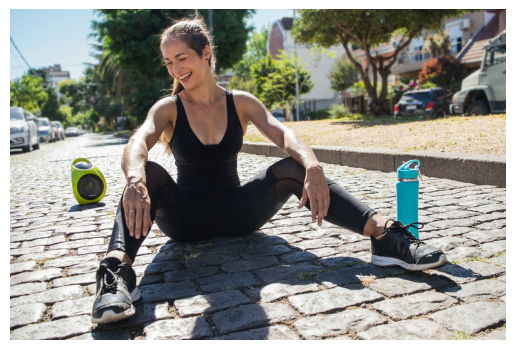

In [287]:
import cv2
import matplotlib.pyplot as plt


def cv2_imshow(image):
    """
    Display an image using matplotlib in Jupyter Notebook.

    Args:
        image: The image to display. Should be in BGR format (OpenCV default).
    """
    # Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide the axis
    plt.show()

girl_img = cv2.imread("sample-frames/mp_example.png")
cv2_imshow(girl_img)

### **Media Pipeline**

In [288]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

def mp_init_detector(model_path='mp-model/pose_landmarker.task'):
    # STEP 2: Create a PoseLandmarker object.
    base_options = python.BaseOptions(model_asset_path=model_path)
    options = vision.PoseLandmarkerOptions(
        base_options=base_options,
        output_segmentation_masks=True)
    return vision.PoseLandmarker.create_from_options(options)

def mp_process_image(detector, img_path):
    image = mp.Image.create_from_file(img_path)

    # Detect features in image
    detection_result = detector.detect(image)

    # Associate enums with string values
    body_parts_dict = {
        'nose': mp.solutions.pose.PoseLandmark.NOSE,
        'left_eye_inner': mp.solutions.pose.PoseLandmark.LEFT_EYE_INNER,
        'left_eye': mp.solutions.pose.PoseLandmark.LEFT_EYE,
        'left_eye_outer': mp.solutions.pose.PoseLandmark.LEFT_EYE_OUTER,
        'right_eye_inner': mp.solutions.pose.PoseLandmark.RIGHT_EYE_INNER,
        'right_eye': mp.solutions.pose.PoseLandmark.RIGHT_EYE,
        'right_eye_outer': mp.solutions.pose.PoseLandmark.RIGHT_EYE_OUTER,
        'left_ear': mp.solutions.pose.PoseLandmark.LEFT_EAR,
        'right_ear': mp.solutions.pose.PoseLandmark.RIGHT_EAR,
        'mouth_left': mp.solutions.pose.PoseLandmark.MOUTH_LEFT,
        'mouth_right': mp.solutions.pose.PoseLandmark.MOUTH_RIGHT,
        'left_shoulder': mp.solutions.pose.PoseLandmark.LEFT_SHOULDER,
        'right_shoulder': mp.solutions.pose.PoseLandmark.RIGHT_SHOULDER,
        'left_elbow': mp.solutions.pose.PoseLandmark.LEFT_ELBOW,
        'right_elbow': mp.solutions.pose.PoseLandmark.RIGHT_ELBOW,
        'left_wrist': mp.solutions.pose.PoseLandmark.LEFT_WRIST,
        'right_wrist': mp.solutions.pose.PoseLandmark.RIGHT_WRIST,
        'left_pinky': mp.solutions.pose.PoseLandmark.LEFT_PINKY,
        'right_pinky': mp.solutions.pose.PoseLandmark.RIGHT_PINKY,
        'left_index': mp.solutions.pose.PoseLandmark.LEFT_INDEX,
        'right_index': mp.solutions.pose.PoseLandmark.RIGHT_INDEX,
        'left_thumb': mp.solutions.pose.PoseLandmark.LEFT_THUMB,
        'right_thumb': mp.solutions.pose.PoseLandmark.RIGHT_THUMB,
        'left_hip': mp.solutions.pose.PoseLandmark.LEFT_HIP,
        'right_hip': mp.solutions.pose.PoseLandmark.RIGHT_HIP,
        'left_knee': mp.solutions.pose.PoseLandmark.LEFT_KNEE,
        'right_knee': mp.solutions.pose.PoseLandmark.RIGHT_KNEE,
        'left_ankle': mp.solutions.pose.PoseLandmark.LEFT_ANKLE,
        'right_ankle': mp.solutions.pose.PoseLandmark.RIGHT_ANKLE,
        'left_heel': mp.solutions.pose.PoseLandmark.LEFT_HEEL,
        'right_heel': mp.solutions.pose.PoseLandmark.RIGHT_HEEL,
        'left_foot_index': mp.solutions.pose.PoseLandmark.LEFT_FOOT_INDEX,
        'right_foot_index': mp.solutions.pose.PoseLandmark.RIGHT_FOOT_INDEX
    }

    # Create a dictonary so we can index into body parts
    # EX Usage: body_parts['ankle_left]
    body_parts = {}
    if detection_result.pose_landmarks:
        for pose_landmarks in detection_result.pose_landmarks:
            for part_name, part_enum in body_parts_dict.items():
                body_parts[part_name] = pose_landmarks[part_enum]

    return detection_result, body_parts

def mp_debug_show_image(detector, img_path):
    image = mp.Image.create_from_file(img_path)

    if image is None:
        raise ValueError(f"Image at path {img_path} could not be loaded.")

    detection_result, _ = mp_process_image(detector, img_path)

    image_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

    # STEP 5: Process the detection result. In this case, visualize it.
    annotated_image = draw_landmarks_on_image(
        image_rgb,
        detection_result
    )

    # Display the annotated image
    cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))


I0000 00:00:1717114571.063528 12159260 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
W0000 00:00:1717114571.157549 12271600 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1717114571.222524 12271602 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Left Ankle
position: 0.750, 0.664, -0.375
visibility: 0.999


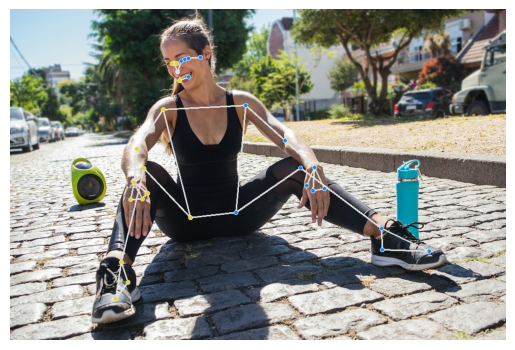

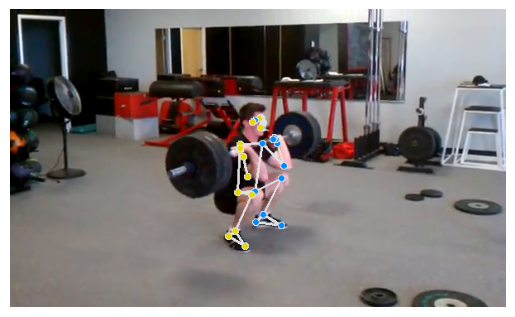

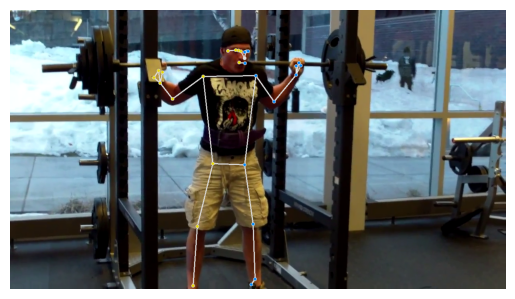

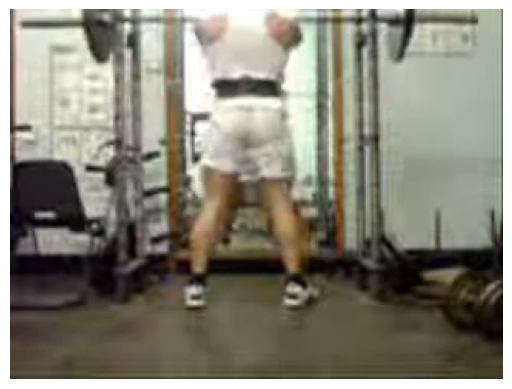

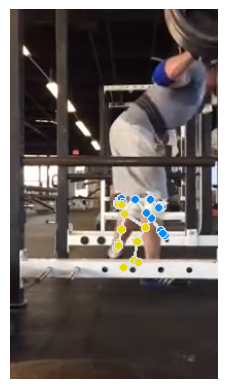

In [289]:
# Usage
mp_detector = mp_init_detector()
detection_results, body_parts = mp_process_image(
    mp_detector,
    "sample-frames/mp_example.png"
)

left_ankle = body_parts['left_ankle']
print("Left Ankle")
print(f"position: {left_ankle.x:.3f}, {left_ankle.y:.3f}, {left_ankle.z:.3f}")
print(f"visibility: {left_ankle.visibility:.3f}")

# Debug
mp_debug_show_image(mp_detector, "sample-frames/mp_example.png")
mp_debug_show_image(mp_detector,"sample-frames/good1.png")
mp_debug_show_image(mp_detector,"sample-frames/good2.png")

mp_debug_show_image(mp_detector,"sample-frames/bad1.png")
mp_debug_show_image(mp_detector,"sample-frames/bad2.png")

### **Push Up Detection**

In [300]:
import math

def calculate_angle(a, b, c):
    a = np.array([a.x, a.y, a.z])
    b = np.array([b.x, b.y, b.z])
    c = np.array([c.x, c.y, c.z])

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

def do_pushup(body_parts, vis_threshold=0.75):
    l_sh = body_parts['left_shoulder']
    l_elbow = body_parts['left_elbow']
    l_wrist = body_parts['left_wrist']
    r_sh = body_parts['right_shoulder']
    r_elbow = body_parts['right_elbow']
    r_wrist = body_parts['right_wrist']
    l_hip = body_parts['left_hip']
    r_hip = body_parts['right_hip']
    l_ankle = body_parts['left_ankle']
    r_ankle = body_parts['right_ankle']

    # Get visibility of left and right sides
    # Left arm
    l_vis = l_wrist.visibility + l_elbow.visibility + l_sh.visibility
    # Left leg
    l_vis += l_ankle.visibility + l_hip.visibility
    # Normalize
    l_vis = l_vis / 5

    # Right arm
    r_vis = r_wrist.visibility + r_elbow.visibility + r_sh.visibility
    # Right leg
    r_vis += r_ankle.visibility + r_hip.visibility
    # Normalize
    r_vis = r_vis / 5

    # Visibility (assuming 1 arm/ankle will always be obstructed)
    if l_vis < vis_threshold and r_vis >= vis_threshold:
        l_sh, l_elbow, l_wrist = r_sh, r_elbow, r_wrist
        l_hip, l_ankle = r_hip, r_ankle
    elif r_vis < vis_threshold and l_vis >= vis_threshold:
        r_sh, r_elbow, r_wrist = l_sh, l_elbow, l_wrist
        r_hip, r_ankle = l_hip, l_ankle
    elif l_vis < vis_threshold and r_vis < vis_threshold:
        return -1

    # Calculate angles
    shoulder_angle = calculate_angle(l_hip, l_sh, l_elbow)
    elbow_angle = calculate_angle(l_sh, l_elbow, l_wrist)
    hip_angle = calculate_angle(l_sh, l_hip, l_ankle)
    print(f"Shoulder Angle: {shoulder_angle}")
    print(f"Elbow Angle: {elbow_angle}")
    print(f"Hip Angle: {hip_angle}")

    if 50 < shoulder_angle < 70 and 160 < elbow_angle < 180 and 160 < hip_angle < 180:
        # Raised pushup
        return 2
    elif 0 < shoulder_angle < 20 and 80 < elbow_angle < 100 and 160 < hip_angle < 180:
        # Lower pushup
        return 1
    else:
        # Bad posture
        return 0

In [301]:
def pushup_detector(img_path):
    # Media pipeline
    mp_detector = mp_init_detector()
    detection_results, body_parts = mp_process_image(
        mp_detector,
        img_path
    )

    # Body part usage
    if bool(body_parts):
        # Mediapipe debug
        mp_debug_show_image(mp_detector, img_path)

        # Pushup detect Usage
        print("Pushup Detector")
        pushup_res  = do_pushup(body_parts, vis_threshold=0.75)
        if pushup_res < 0:
            print(f"WARNING: Low visibility confidence, skipping {img_path}")
        elif pushup_res > 0:
            print("Good posture")
        else:
            print("Bad posture")
    else:
        print(f"WARNING: Mediapipe could not detect landmarks, skipping {img_path}")


I0000 00:00:1717115077.690301 12159260 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
W0000 00:00:1717115077.770899 12277095 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1717115077.817978 12277094 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/opt/homebrew/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


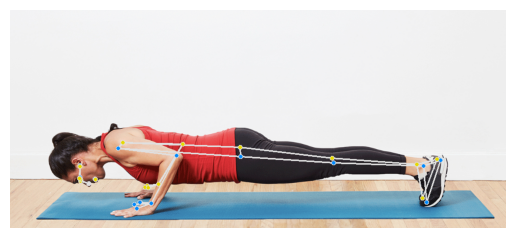

Pushup Detector
Shoulder Angle: 7.314496958265977
Elbow Angle: 92.5777294996123
Hip Angle: 178.142670431341
Good posture


I0000 00:00:1717115078.130967 12159260 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
W0000 00:00:1717115078.246881 12277116 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1717115078.300432 12277116 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


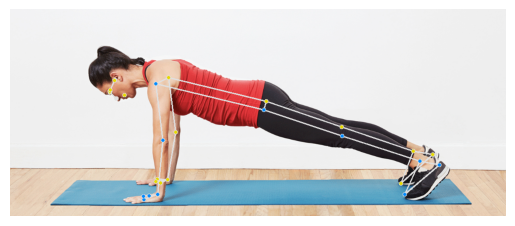

Pushup Detector
Shoulder Angle: 57.24271528986876
Elbow Angle: 174.86527718202385
Hip Angle: 171.5638703660026
Good posture


In [302]:
# Good examples for range of motion
pushup_detector("sample-frames/pushup_rom1.png")
pushup_detector("sample-frames/pushup_rom2.png")


I0000 00:00:1717115148.369873 12159260 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
W0000 00:00:1717115148.484519 12277717 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1717115148.541308 12277716 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


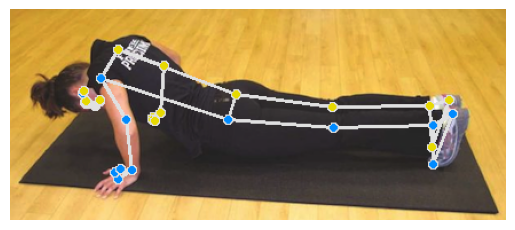

Pushup Detector
Shoulder Angle: 38.15701418821998
Elbow Angle: 168.4485377095199
Hip Angle: 146.1559128397389
Bad posture


I0000 00:00:1717115148.837761 12159260 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
W0000 00:00:1717115148.920638 12277732 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1717115148.955032 12277732 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


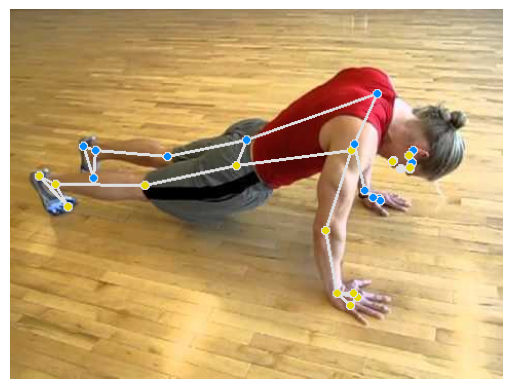

Pushup Detector
Shoulder Angle: 65.90523137090726
Elbow Angle: 158.16592036830022
Hip Angle: 177.19419580541827
Bad posture


In [304]:
# Good examples for bad posture
pushup_detector("sample-frames/bad_pushup.png")
pushup_detector("sample-frames/pushup_bad.jpeg")


I0000 00:00:1717115201.090867 12159260 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
W0000 00:00:1717115201.176767 12278257 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1717115201.238897 12278257 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


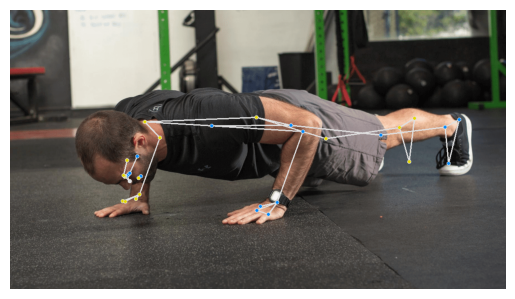

Pushup Detector
Shoulder Angle: 7.2722508009048425
Elbow Angle: 84.75896870320031
Hip Angle: 178.08719382441046
Good posture


I0000 00:00:1717115201.564905 12159260 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
W0000 00:00:1717115201.657178 12278273 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1717115201.705908 12278277 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


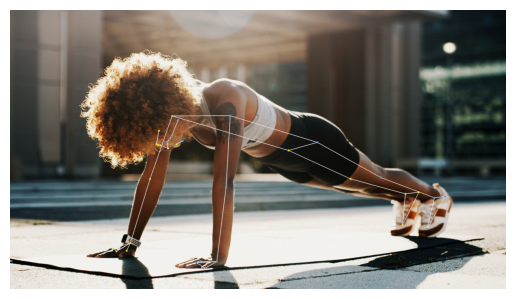

Pushup Detector
Shoulder Angle: 63.26199986986896
Elbow Angle: 177.87586920160808
Hip Angle: 168.55566115718665
Good posture


In [305]:
# Multi angle for good posture
pushup_detector("sample-frames/pushup2.png")
pushup_detector("sample-frames/pushup_good.jpeg")
